# Load and correlate a set of 6 traces (3 for cell1, 3 for cell2)

In [33]:
import numpy as np
import pandas as pd
import scipy
import scipy.io as spio
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from os import listdir
from os.path import isfile, join

# Load data for each cell and genotype into a dataframe

In [62]:
# Load the neuron A control genotype data into a dataframe
dfAc = pd.read_excel('AwithAchrim_ctrl1_20171013.xlsx',sheet_name=0, header=1)
dfAc=dfAc[0:100]
dfAc[0:3]

,fly1,fly2,fly3,fly4,fly5,fly6,fly7
0,0.312961,-0.580163,-0.598497,0.003492,0.385425,-0.837685,-0.647115
1,-0.545628,0.164981,0.590876,0.070686,0.452542,0.503481,-0.561781
2,0.171227,0.266987,0.051796,-0.511666,-0.210294,-0.271616,0.617057


In [61]:
# Get means
dfAcMean = pd.DataFrame({'AcMean':dfAc.mean(axis=1)})
dfAcMean[0:3]

,AcMean
0,-0.280226
1,0.096451
2,0.016213


In [63]:
# Load the neuron B control genotype data into a dataframe
dfBc = pd.read_excel('BwithAchrim_ctrl1_20171013.xlsx',sheet_name=0, header=1)  
dfBc=dfBc[0:100]

In [65]:
# Get means
dfBcMean = pd.DataFrame({'BcMean':dfBc.mean(axis=1)})
dfBcMean[0:3]

,BcMean
0,-0.175105
1,-0.026465
2,0.236116


In [36]:
# Load the cell B experimental (light-sensitive) genotype data
dfBe = pd.read_excel('BwithAchrim_expt_20171013.xlsx',sheet_name=0, header=1)
dfBe=dfBe[0:100]
dfBe[0:1]

,fly1,fly2,fly3,fly4,fly5,fly6
0,0.481751,-0.351541,-0.181905,-0.223429,0.241106,0.336005


,BeMean
0,0.050331
1,0.236128
2,0.346278


In [37]:
# Load the cell A experimental (light-sensitive) genotype data
dfAe = pd.read_excel('AwithAchrim_expt_20171013.xlsx',sheet_name=0, header=1)
dfAe=dfAe[0:100]
dfAe[0:1]

,fly1,fly2,fly3,fly4,fly5,fly6
0,-0.100264,-0.339643,-0.116948,-0.333907,-2.836228,-2.437536


In [68]:
# Get means
dfAeMean = pd.DataFrame({'AeMean':dfAe.mean(axis=1)})
dfAeMean[0:3]

,AeMean
0,-1.027421
1,-1.134583
2,-1.031204


# Join the dataframes 

In [69]:
# Fly by fly data
frames = [dfBc, dfAc, dfBe, dfAe]
dfAll = pd.concat(frames,axis=1)
dfAll[0:1]

,fly1,fly2,fly3,fly4,fly5,fly6,fly7,fly1,fly2,fly3,...,fly3,fly4,fly5,fly6,fly1,fly2,fly3,fly4,fly5,fly6
0,-0.65938,-0.372606,-0.179531,-0.182738,-0.134835,0.611704,-0.308351,0.312961,-0.580163,-0.598497,...,-0.181905,-0.223429,0.241106,0.336005,-0.100264,-0.339643,-0.116948,-0.333907,-2.836228,-2.437536


In [76]:
# Means for each condition
framesMeans = [dfBcMean, dfBeMean, dfAcMean, dfAeMean]
dfMeans = pd.concat(framesMeans,axis=1)
dfMeans[0:3]

,BcMean,BeMean,AcMean,AeMean
0,-0.175105,0.050331,-0.280226,-1.027421
1,-0.026465,0.236128,0.096451,-1.134583
2,0.236116,0.346278,0.016213,-1.031204


# Calculate correlations

In [77]:
# Fly by fly
corrMat = dfAll.corr(method='spearman')

In [78]:
# Means only
corrMatMeans = dfMeans.corr(method='spearman')

# Make a heatmap of the Spearman Correlations of the Means

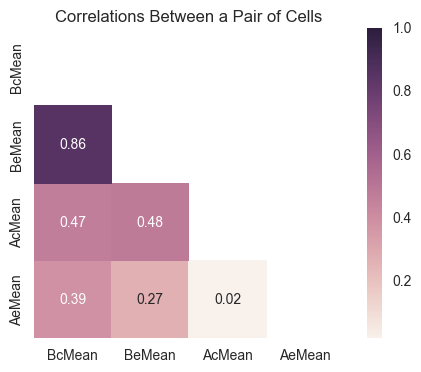

In [79]:
mask = np.zeros_like(corrMatMeans)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corrMatMeans, mask=mask, square=True, annot=True).set_title('Correlations Between a Pair of Cells')

# What does this mean?
* Neuron B in genotype c is highly correlated with Neuron B in genotype e.  
* Neuron A in in genotype c is uncorrelated with Neuron A in genotype e.  This is not surprising, since flies are experiencing a flash of light which can activate A in genotype e, but not in genotype c. 
* We wanted to know whether activating A corresponds to a change in correlation between A and B, so we want to look at Corr(BcMean,AcMean) vs Corr(BeMean,AeMean).  Corr(BcMean,AcMean) = 0.47 and Corr(BeMean,AeMean) = 0.27, so it appears that the average responses of A and B were less correlated when Neuron A was activated.  
